In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('SalmonandSeaTroutNets1952-2022.csv', sep=",")

In [5]:
# Первые 5 строк датасета
data.head()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [6]:
# Размер датасета - 23143 строк, 21 колонок
data.shape

(23143, 21)

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 23143


In [8]:
# Список колонок
data.columns

Index(['District', 'District ID', 'Report order', 'Region', 'Method', 'Year',
       'Month', 'Month number', 'Wild MSW number', 'Wild MSW weight (kg)',
       'Wild 1SW number', 'Wild 1SW weight (kg)', 'Sea trout number',
       'Sea trout weight (kg)', 'Finnock number', 'Finnock weight (kg)',
       'Farmed MSW number', 'Farmed MSW weight (kg)', 'Farmed 1SW number',
       'Farmed 1SW weight (kg)', 'Netting effort'],
      dtype='object')

In [9]:
# Список колонок с типами данных
data.dtypes

District                   object
District ID               float64
Report order              float64
Region                     object
Method                     object
Year                      float64
Month                      object
Month number              float64
Wild MSW number           float64
Wild MSW weight (kg)      float64
Wild 1SW number           float64
Wild 1SW weight (kg)      float64
Sea trout number          float64
Sea trout weight (kg)     float64
Finnock number            float64
Finnock weight (kg)       float64
Farmed MSW number         float64
Farmed MSW weight (kg)    float64
Farmed 1SW number         float64
Farmed 1SW weight (kg)    float64
Netting effort            float64
dtype: object

In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

District - 3
District ID - 3
Report order - 3
Region - 3
Method - 3
Year - 3
Month - 3
Month number - 3
Wild MSW number - 3
Wild MSW weight (kg) - 3
Wild 1SW number - 3
Wild 1SW weight (kg) - 3
Sea trout number - 3
Sea trout weight (kg) - 3
Finnock number - 3
Finnock weight (kg) - 3
Farmed MSW number - 3
Farmed MSW weight (kg) - 3
Farmed 1SW number - 3
Farmed 1SW weight (kg) - 3
Netting effort - 3


In [11]:

# Основные статистические характеристки набора данных
data.describe()

,District ID,Report order,Year,Month number,Wild MSW number,Wild MSW weight (kg),Wild 1SW number,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
count,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000
mean,56.267545,43.906828,1976.433794,6.028781,234.774503,1137.728384,346.497364,881.932226,229.061538,258.005052,0.002766,0.002182,0.097623,0.425190,0.109594,0.282239,24.137878
std,32.715546,35.787668,16.645369,1.793270,730.544329,3756.927117,1308.250523,3426.441037,1026.370657,1306.411901,0.087664,0.076901,1.763693,8.164855,2.221477,6.221872,146.277418
min,1.000000,1.000000,1952.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,10.000000,1963.000000,5.000000,4.000000,18.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,30.000000,1975.000000,6.000000,30.000000,136.500000,8.000000,19.500000,6.000000,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,91.000000,81.000000,1987.000000,7.000000,161.000000,739.925000,152.000000,378.825000,49.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,109.000000,108.000000,2022.000000,11.000000,18942.000000,102188.000000,34633.000000,103010.800000,26126.000000,46142.600000,5.000000,5.700000,129.000000,621.800000,209.000000,639.600000,2215.000000


In [12]:
# Определим уникальные значения для целевого признака
data['Wild MSW number'].unique()

array([ 107., 6606.,  185., ..., 3270., 4100.,   nan])

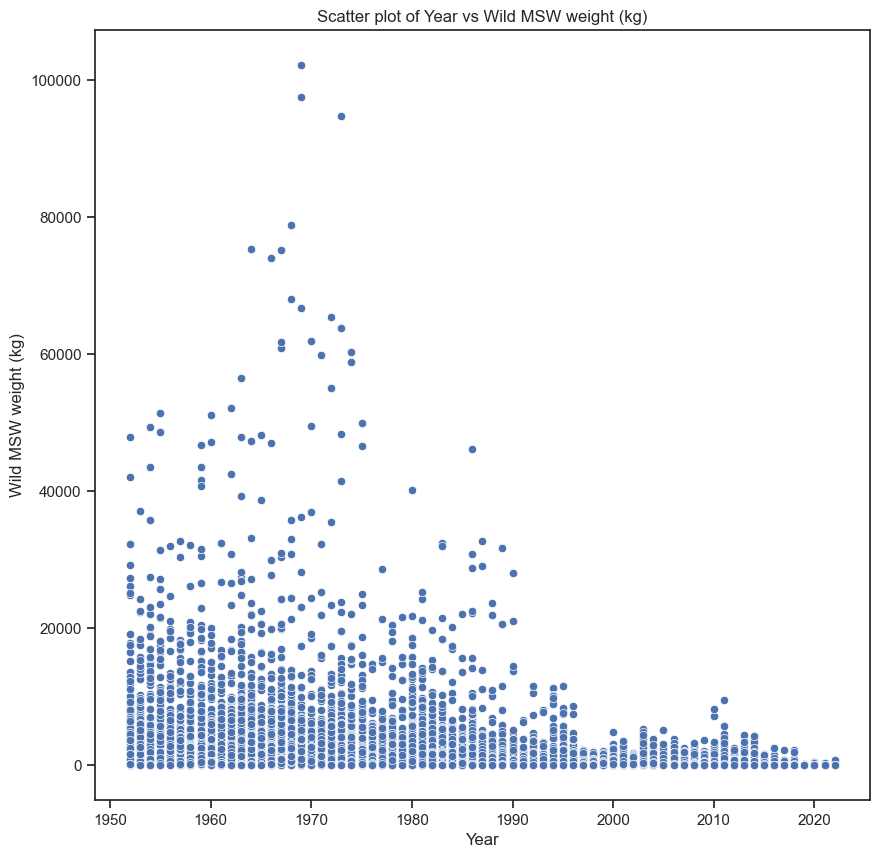

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x='Year', y='Wild MSW weight (kg)', data=data)
plt.title('Scatter plot of Year vs Wild MSW weight (kg)')
plt.xlabel('Year')
plt.ylabel('Wild MSW weight (kg)')
plt.show()

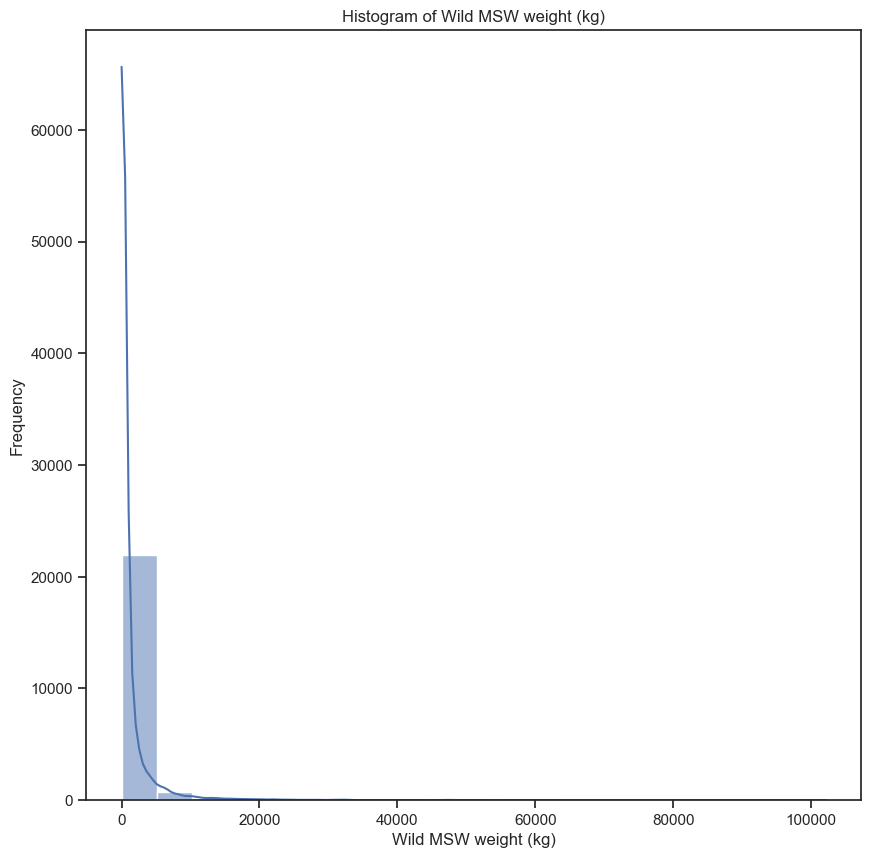

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data['Wild MSW weight (kg)'], bins=20, kde=True)
plt.title('Histogram of Wild MSW weight (kg)')
plt.xlabel('Wild MSW weight (kg)')
plt.ylabel('Frequency')
plt.show()


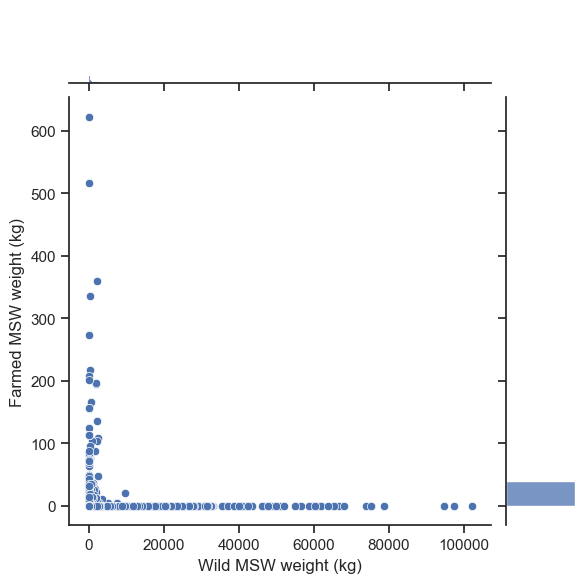

In [15]:
sns.jointplot(x='Wild MSW weight (kg)', y='Farmed MSW weight (kg)', data=data)
plt.show()

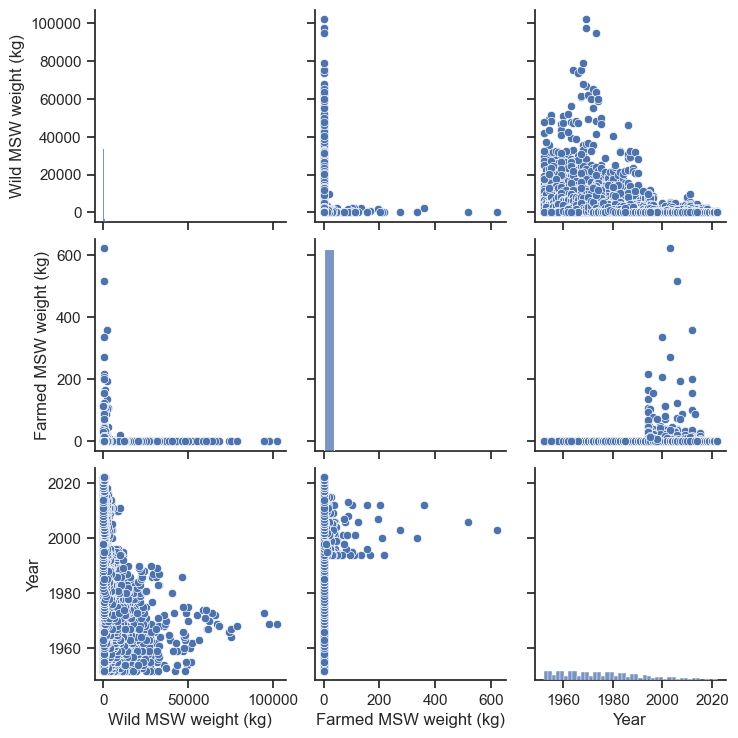

In [16]:
sns.pairplot(data[['Wild MSW weight (kg)', 'Farmed MSW weight (kg)', 'Year']])
plt.show()

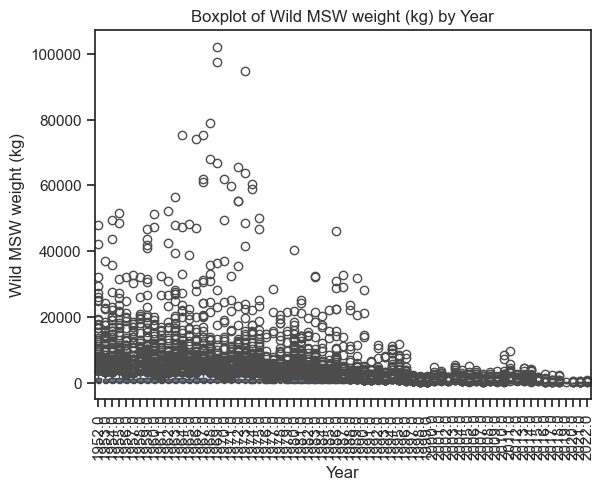

In [17]:
sns.boxplot(x='Year', y='Wild MSW weight (kg)', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Wild MSW weight (kg) by Year')
plt.show()

<Axes: xlabel='Wild MSW weight (kg)'>

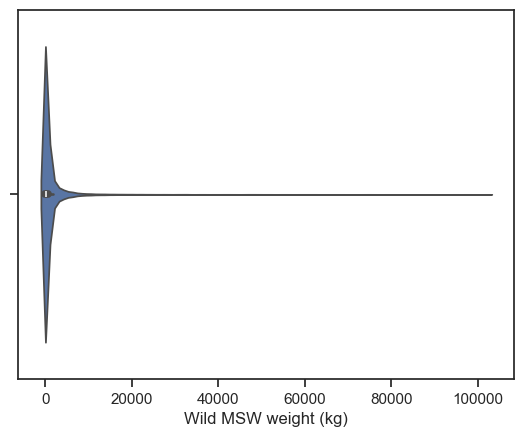

In [18]:
sns.violinplot(x=data['Wild MSW weight (kg)'])

C:\Users\user\AppData\Local\Temp\ipykernel_5364\76422264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Wild MSW weight (kg)'], ax=ax[1])


<Axes: xlabel='Wild MSW weight (kg)', ylabel='Density'>

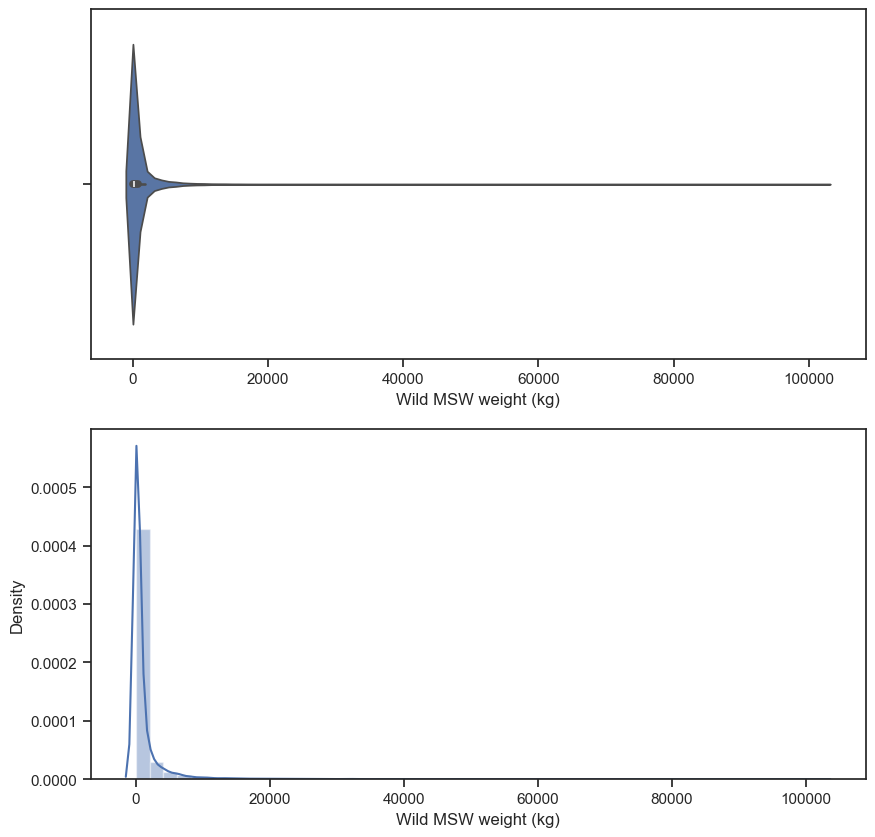

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Wild MSW weight (kg)'])
sns.distplot(data['Wild MSW weight (kg)'], ax=ax[1])

<Axes: xlabel='Year', ylabel='Wild MSW weight (kg)'>

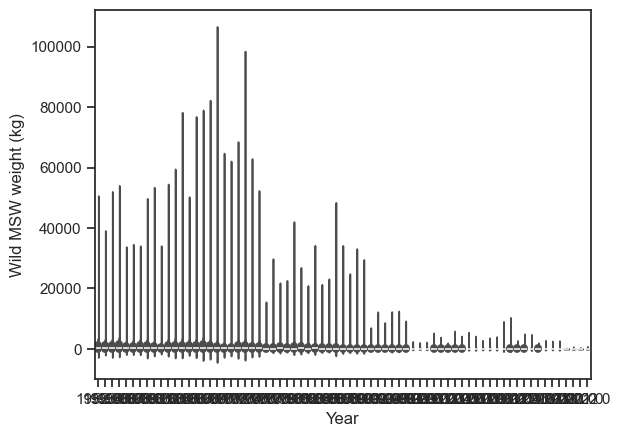

In [20]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Year', y='Wild MSW weight (kg)', data=data)

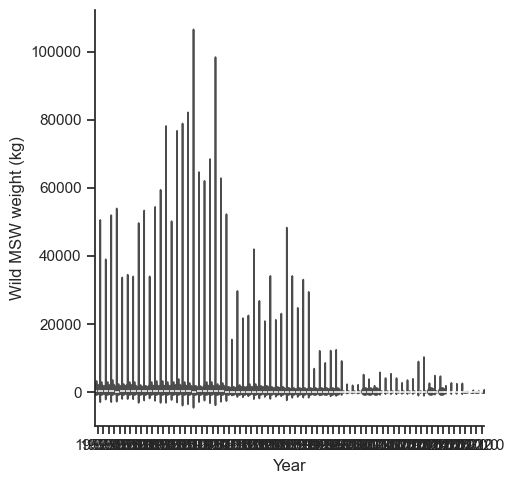

In [21]:
sns.catplot(y='Wild MSW weight (kg)', x='Year', data=data, kind="violin", split=True)

In [22]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)



                        District ID  Report order      Year  Month number  \
District ID                1.000000     -0.205417  0.089607      0.017390   
Report order              -0.205417      1.000000  0.018611      0.163685   
Year                       0.089607      0.018611  1.000000      0.105794   
Month number               0.017390      0.163685  0.105794      1.000000   
Wild MSW number            0.080479     -0.238424 -0.143820     -0.016007   
Wild MSW weight (kg)       0.083728     -0.234119 -0.133087      0.005485   
Wild 1SW number            0.033678     -0.171860 -0.051725      0.161536   
Wild 1SW weight (kg)       0.036024     -0.165705 -0.049599      0.160644   
Sea trout number           0.023947     -0.146696 -0.084863      0.025333   
Sea trout weight (kg)      0.062994     -0.148458 -0.068896      0.034508   
Finnock number             0.007472      0.003581  0.065816      0.008016   
Finnock weight (kg)        0.005175      0.004694  0.057247      0.006690   

In [23]:
correlation_matrix.corr(method='pearson')

,District ID,Report order,Year,Month number,Wild MSW number,Wild MSW weight (kg),Wild 1SW number,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
District ID,1.000000,-0.430936,0.089561,-0.092381,0.061141,0.060595,-0.002578,-0.000640,-0.036183,0.004239,-0.085738,-0.089269,-0.114965,-0.110871,-0.106156,-0.102589,-0.421215
Report order,-0.430936,1.000000,0.113393,0.234456,-0.613326,-0.611767,-0.540268,-0.536729,-0.467941,-0.493956,0.006917,0.007554,0.052126,0.048287,0.046219,0.042683,0.139715
Year,0.089561,0.113393,1.000000,0.100781,-0.501236,-0.494322,-0.405547,-0.403318,-0.436531,-0.426071,0.057062,0.049903,0.095701,0.092013,0.070651,0.066003,-0.312294
Month number,-0.092381,0.234456,0.100781,1.000000,-0.170859,-0.151873,0.040290,0.040456,-0.153903,-0.141052,-0.148608,-0.151734,-0.171929,-0.172555,-0.165521,-0.168160,-0.139169
Wild MSW number,0.061141,-0.613326,-0.501236,-0.170859,1.000000,0.999145,0.849874,0.852907,0.639538,0.663818,-0.261237,-0.261900,-0.363916,-0.360323,-0.355518,-0.352570,0.110791
Wild MSW weight (kg),0.060595,-0.611767,-0.494322,-0.151873,0.999145,1.000000,0.867473,0.870659,0.630450,0.656447,-0.265242,-0.266002,-0.368708,-0.365108,-0.360088,-0.357192,0.101022
Wild 1SW number,-0.002578,-0.540268,-0.405547,0.040290,0.849874,0.867473,1.000000,0.999727,0.572243,0.612178,-0.280749,-0.281963,-0.374316,-0.370975,-0.367352,-0.365080,0.050887
Wild 1SW weight (kg),-0.000640,-0.536729,-0.403318,0.040456,0.852907,0.870659,0.999727,1.000000,0.557472,0.597835,-0.279669,-0.280894,-0.373778,-0.370439,-0.366287,-0.364035,0.045189
Sea trout number,-0.036183,-0.467941,-0.436531,-0.153903,0.639538,0.630450,0.572243,0.557472,1.000000,0.995373,-0.264493,-0.265816,-0.375130,-0.372651,-0.363163,-0.360961,0.329449
Sea trout weight (kg),0.004239,-0.493956,-0.426071,-0.141052,0.663818,0.656447,0.612178,0.597835,0.995373,1.000000,-0.269399,-0.270853,-0.380687,-0.378069,-0.368828,-0.366547,0.256247


In [24]:
correlation_matrix.corr(method='spearman')

,District ID,Report order,Year,Month number,Wild MSW number,Wild MSW weight (kg),Wild 1SW number,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
District ID,1.000000,-0.713235,-0.041667,0.031863,0.436275,0.490196,0.514706,0.517157,0.438725,0.465686,-0.421569,-0.443627,-0.409314,-0.397059,-0.352941,-0.313725,-0.191176
Report order,-0.713235,1.000000,0.490196,0.343137,-0.821078,-0.745098,-0.610294,-0.607843,-0.671569,-0.705882,0.544118,0.544118,0.578431,0.553922,0.649510,0.629902,-0.137255
Year,-0.041667,0.490196,1.000000,0.345588,-0.764706,-0.696078,-0.573529,-0.571078,-0.727941,-0.725490,0.789216,0.767157,0.774510,0.754902,0.811275,0.821078,-0.870098
Month number,0.031863,0.343137,0.345588,1.000000,-0.411765,-0.262255,0.004902,0.002451,-0.176471,-0.200980,0.009804,-0.007353,0.125000,0.073529,0.294118,0.291667,-0.073529
Wild MSW number,0.436275,-0.821078,-0.764706,-0.411765,1.000000,0.946078,0.828431,0.830882,0.848039,0.867647,-0.715686,-0.713235,-0.745098,-0.725490,-0.838235,-0.833333,0.497549
Wild MSW weight (kg),0.490196,-0.745098,-0.696078,-0.262255,0.946078,1.000000,0.911765,0.914216,0.911765,0.916667,-0.750000,-0.767157,-0.818627,-0.799020,-0.855392,-0.848039,0.512255
Wild 1SW number,0.514706,-0.610294,-0.573529,0.004902,0.828431,0.911765,1.000000,0.997549,0.835784,0.833333,-0.808824,-0.816176,-0.686275,-0.676471,-0.656863,-0.642157,0.406863
Wild 1SW weight (kg),0.517157,-0.607843,-0.571078,0.002451,0.830882,0.914216,0.997549,1.000000,0.833333,0.830882,-0.806373,-0.811275,-0.688725,-0.678922,-0.654412,-0.639706,0.404412
Sea trout number,0.438725,-0.671569,-0.727941,-0.176471,0.848039,0.911765,0.835784,0.833333,1.000000,0.995098,-0.725490,-0.752451,-0.882353,-0.887255,-0.845588,-0.840686,0.632353
Sea trout weight (kg),0.465686,-0.705882,-0.725490,-0.200980,0.867647,0.916667,0.833333,0.830882,0.995098,1.000000,-0.725490,-0.750000,-0.877451,-0.887255,-0.850490,-0.843137,0.615196


<Axes: >

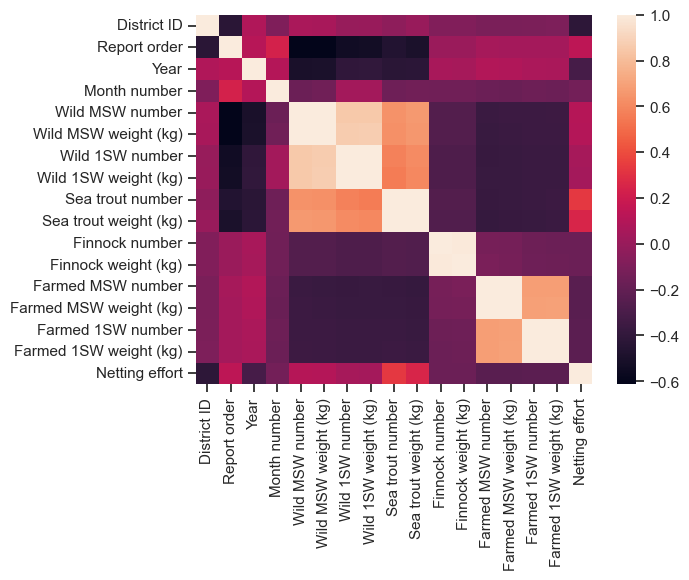

In [25]:
sns.heatmap(correlation_matrix.corr())

<Axes: >

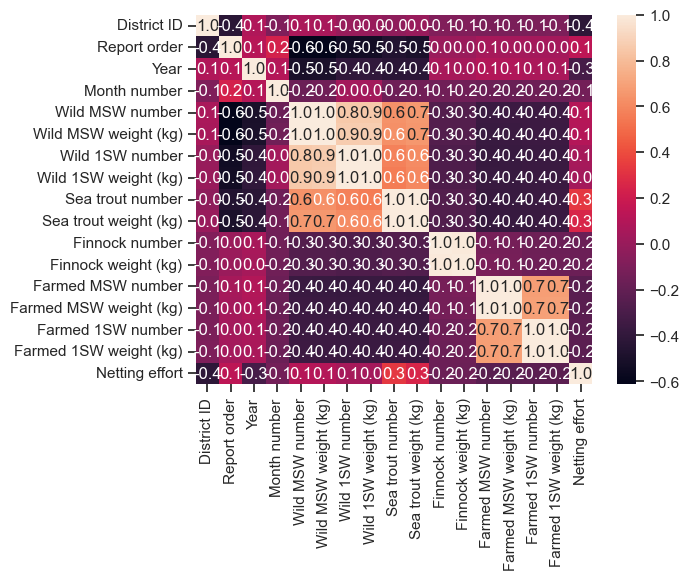

In [26]:

# Вывод значений в ячейках
sns.heatmap(correlation_matrix.corr(), annot=True, fmt='.1f')

<Axes: >

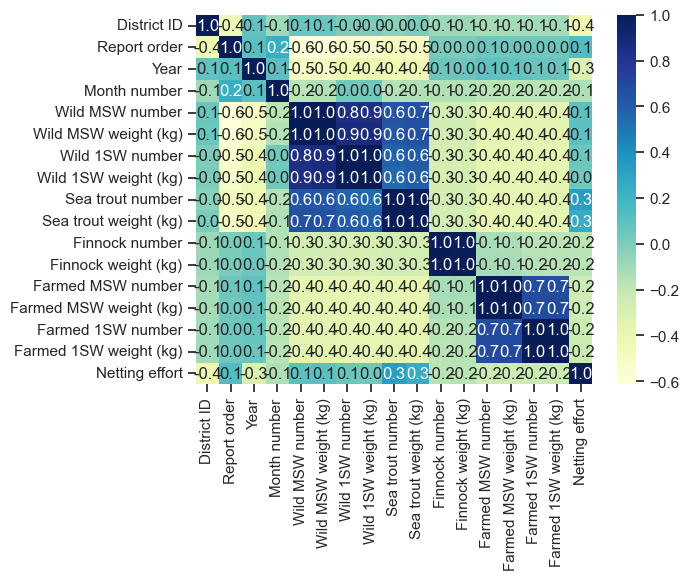

In [27]:
# Изменение цветовой гаммы
sns.heatmap(correlation_matrix.corr(), cmap='YlGnBu', annot=True, fmt='.1f')

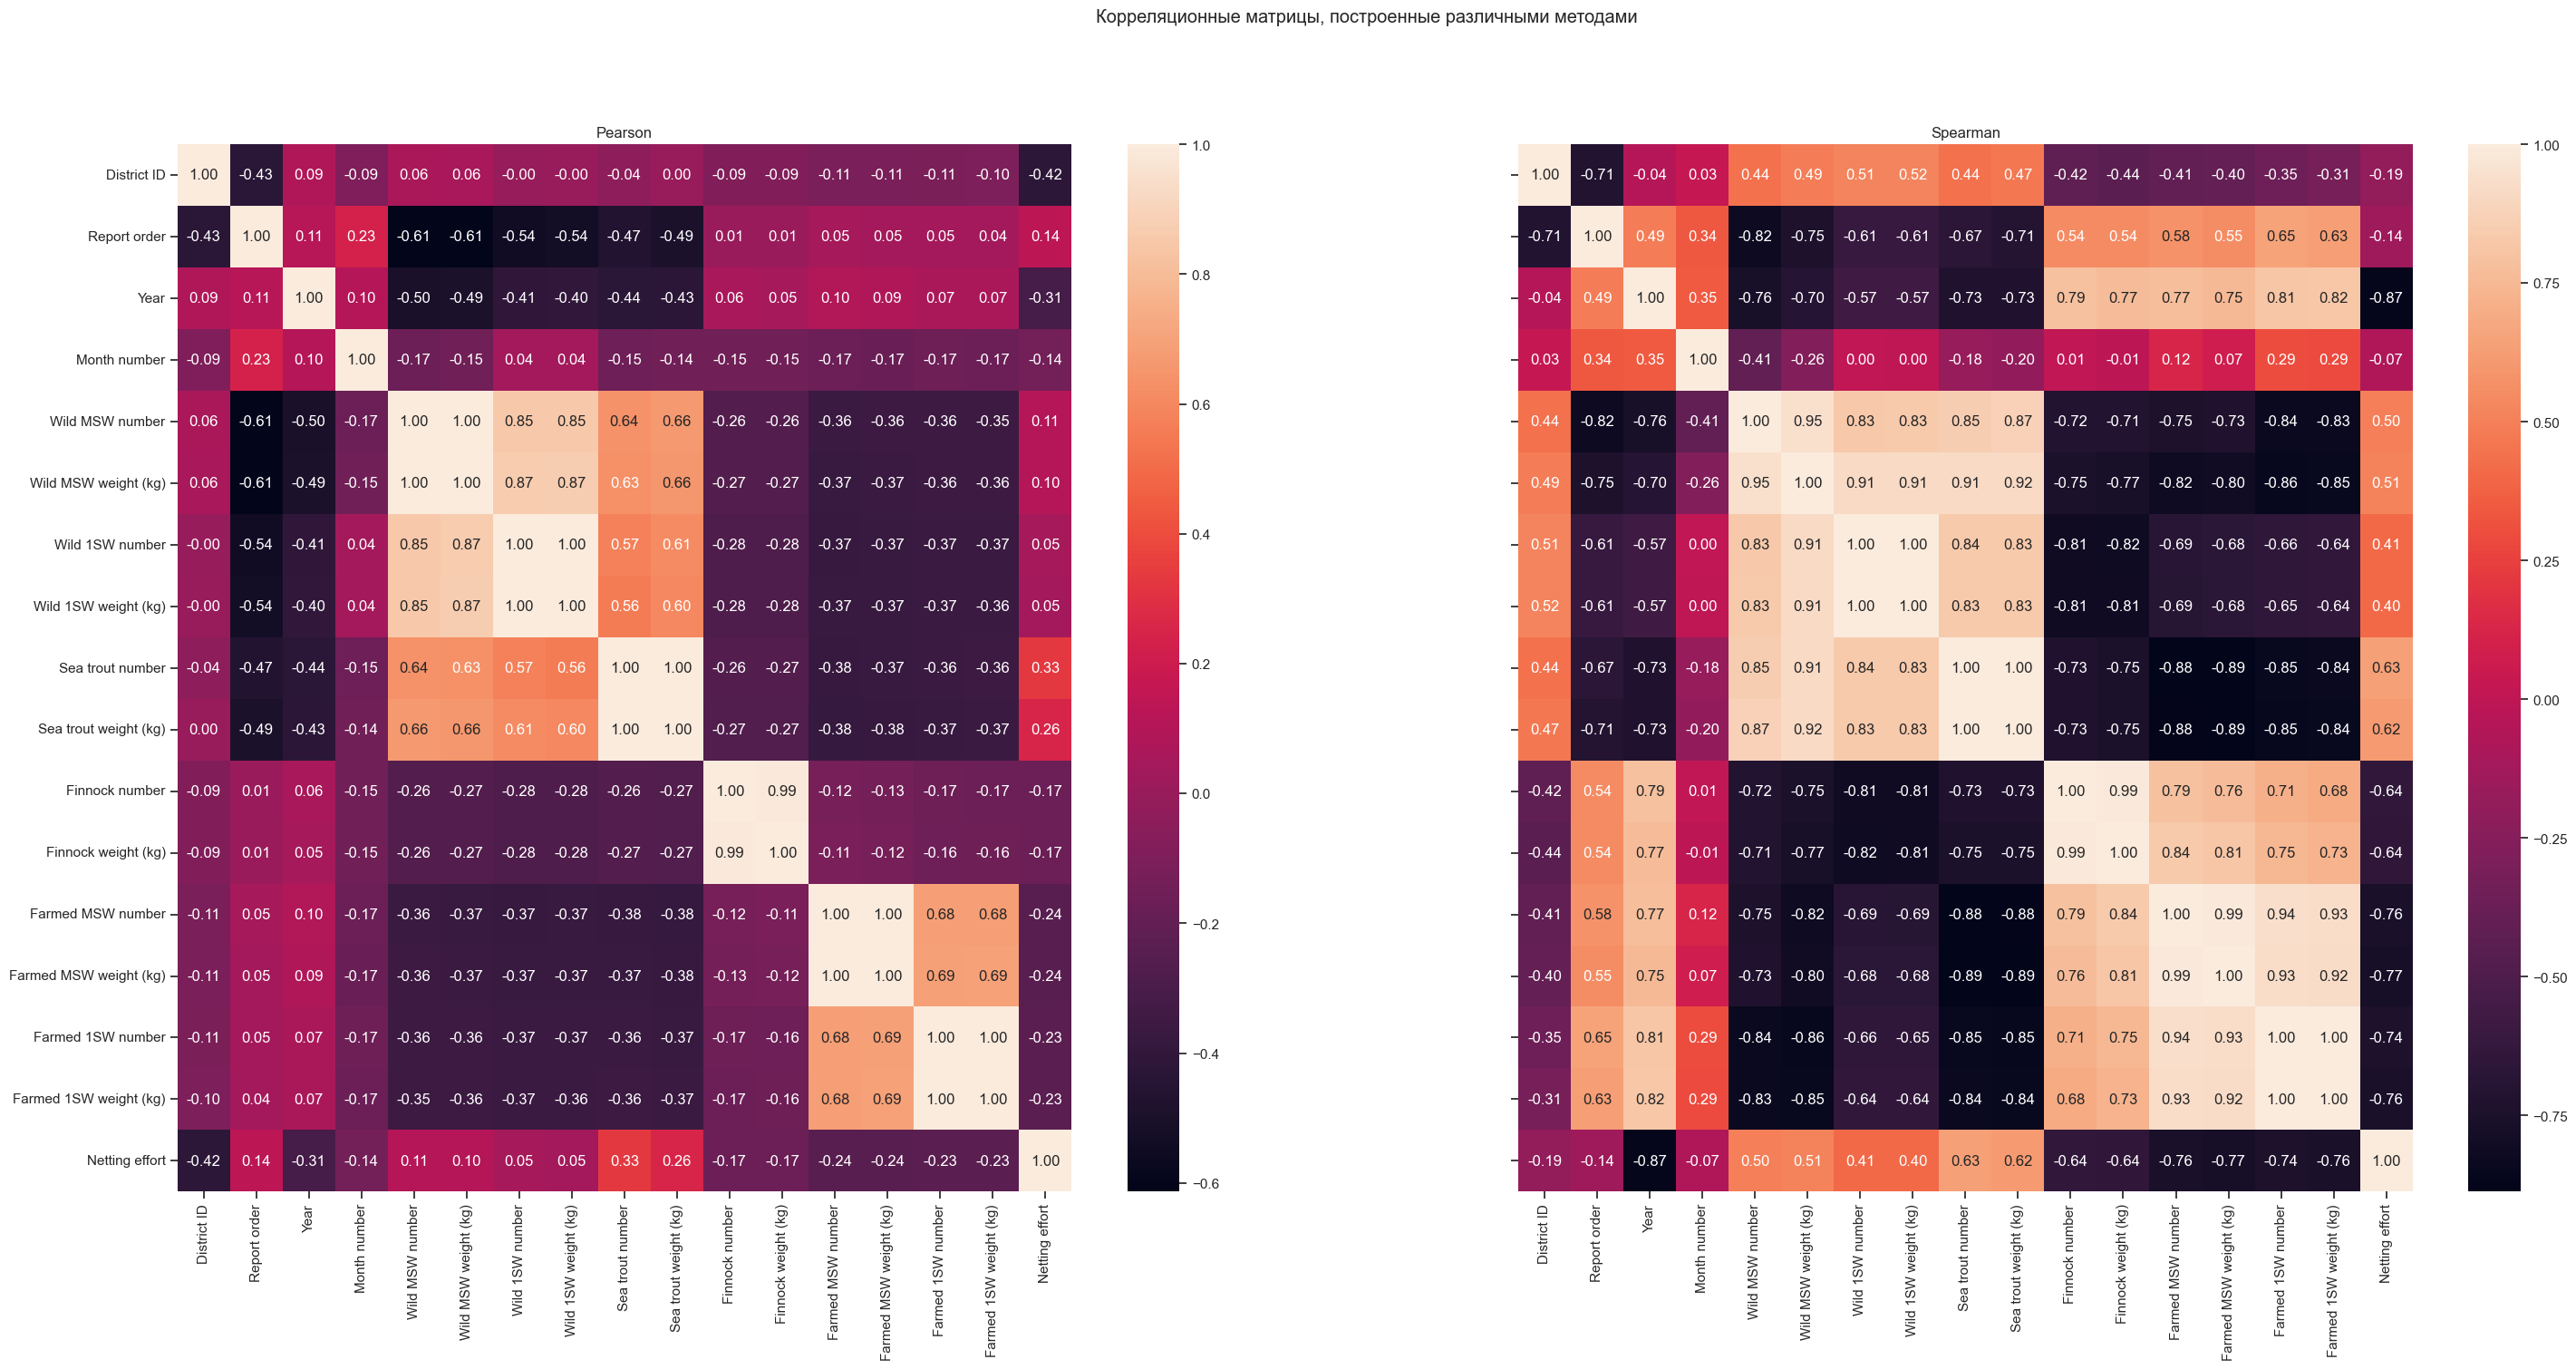

In [28]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(35,15))
sns.heatmap(correlation_matrix.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(correlation_matrix.corr(method='spearman'), ax=ax[1], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Spearman')